<a href="https://colab.research.google.com/github/SergioZF09/inmersion-datos-python/blob/main/Clase-2/credito_banco_aleman_inmersion_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INMERSIÓN DE DATOS CON PYTHON

# **PROBLEMA DE NEGOCIO**

---

La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

**Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

# 1. Configuración del Ambiente

In [ ]:
# prompt: importa los siguientes módulos con sus respectivos alias: pandas, matplotlib, seaborn, drive de google colab, warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

drive.mount("/content/drive")
warnings.filterwarnings("ignore")

Mounted at /content/drive


# 2. Preprocesamiento de Datos

In [ ]:
pd.set_option("display.max_columns", None)
global df_banco, resultado

In [ ]:
df_banco = pd.read_csv("/content/drive/MyDrive/Alura Latam/Inmersion Datos con Python/german_credit.csv")
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
df_banco.shape

(1000, 21)

In [ ]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [ ]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [ ]:
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object', name='account_check_status')

In [ ]:
columnas = list(df_banco.select_dtypes(include=['object']).columns)
for columna in columnas:
  print(f"El nombre de la columna: {columna}")
  print(list(df_banco[f'{columna}'].value_counts().index))
  print("\n")

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna: personal_status_sex
['male : single', 'femal

In [ ]:
# dic = {'yes': 1, 'no': 0}
# df_banco['foreign_worker'] = df_banco['foreign_worker'].map(dic)
# df_banco['foreign_worker']

In [ ]:
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes': 1,
       'no': 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [ ]:
procesar_datos()
df_banco.sample(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
111,0,3,15,3,8,392,5,4,4,2,1,4,2,23,3,1,1,3,1,1,1
384,0,4,30,4,10,4272,4,3,2,3,1,2,2,26,3,2,2,2,1,0,1
148,0,1,36,5,4,5371,5,3,3,3,3,2,2,28,3,2,2,3,1,0,1


# 3. Exploración de Datos

In [ ]:
variables_discretas = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount', 'default']
df_banco[variables_discretas].tail(3)

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [ ]:
#dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
#df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)

def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [ ]:
feature_engineering()
df_banco.head(2)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6


In [ ]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


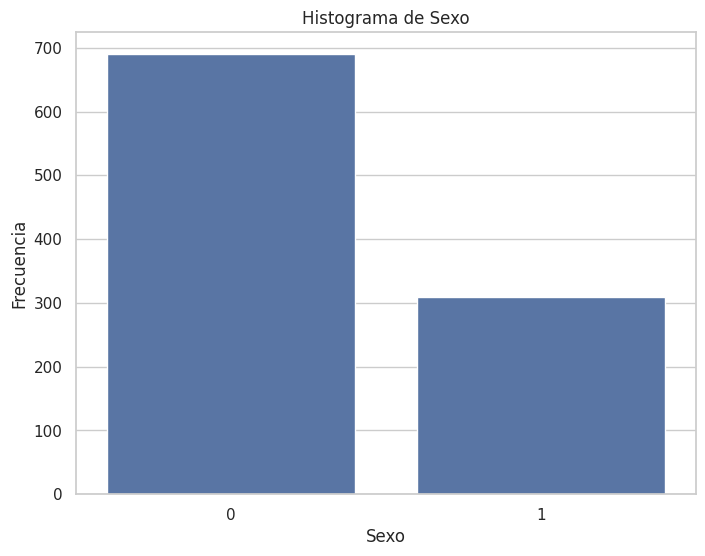

In [ ]:
#Configurar el estilo de seaborn
sns.set(style="whitegrid")

#Crear histograma utilizando seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df_banco, x='sexo')
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

#Mostrar histograma
plt.show()

In [ ]:
def analisis_exploratorio():
  global df_banco
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

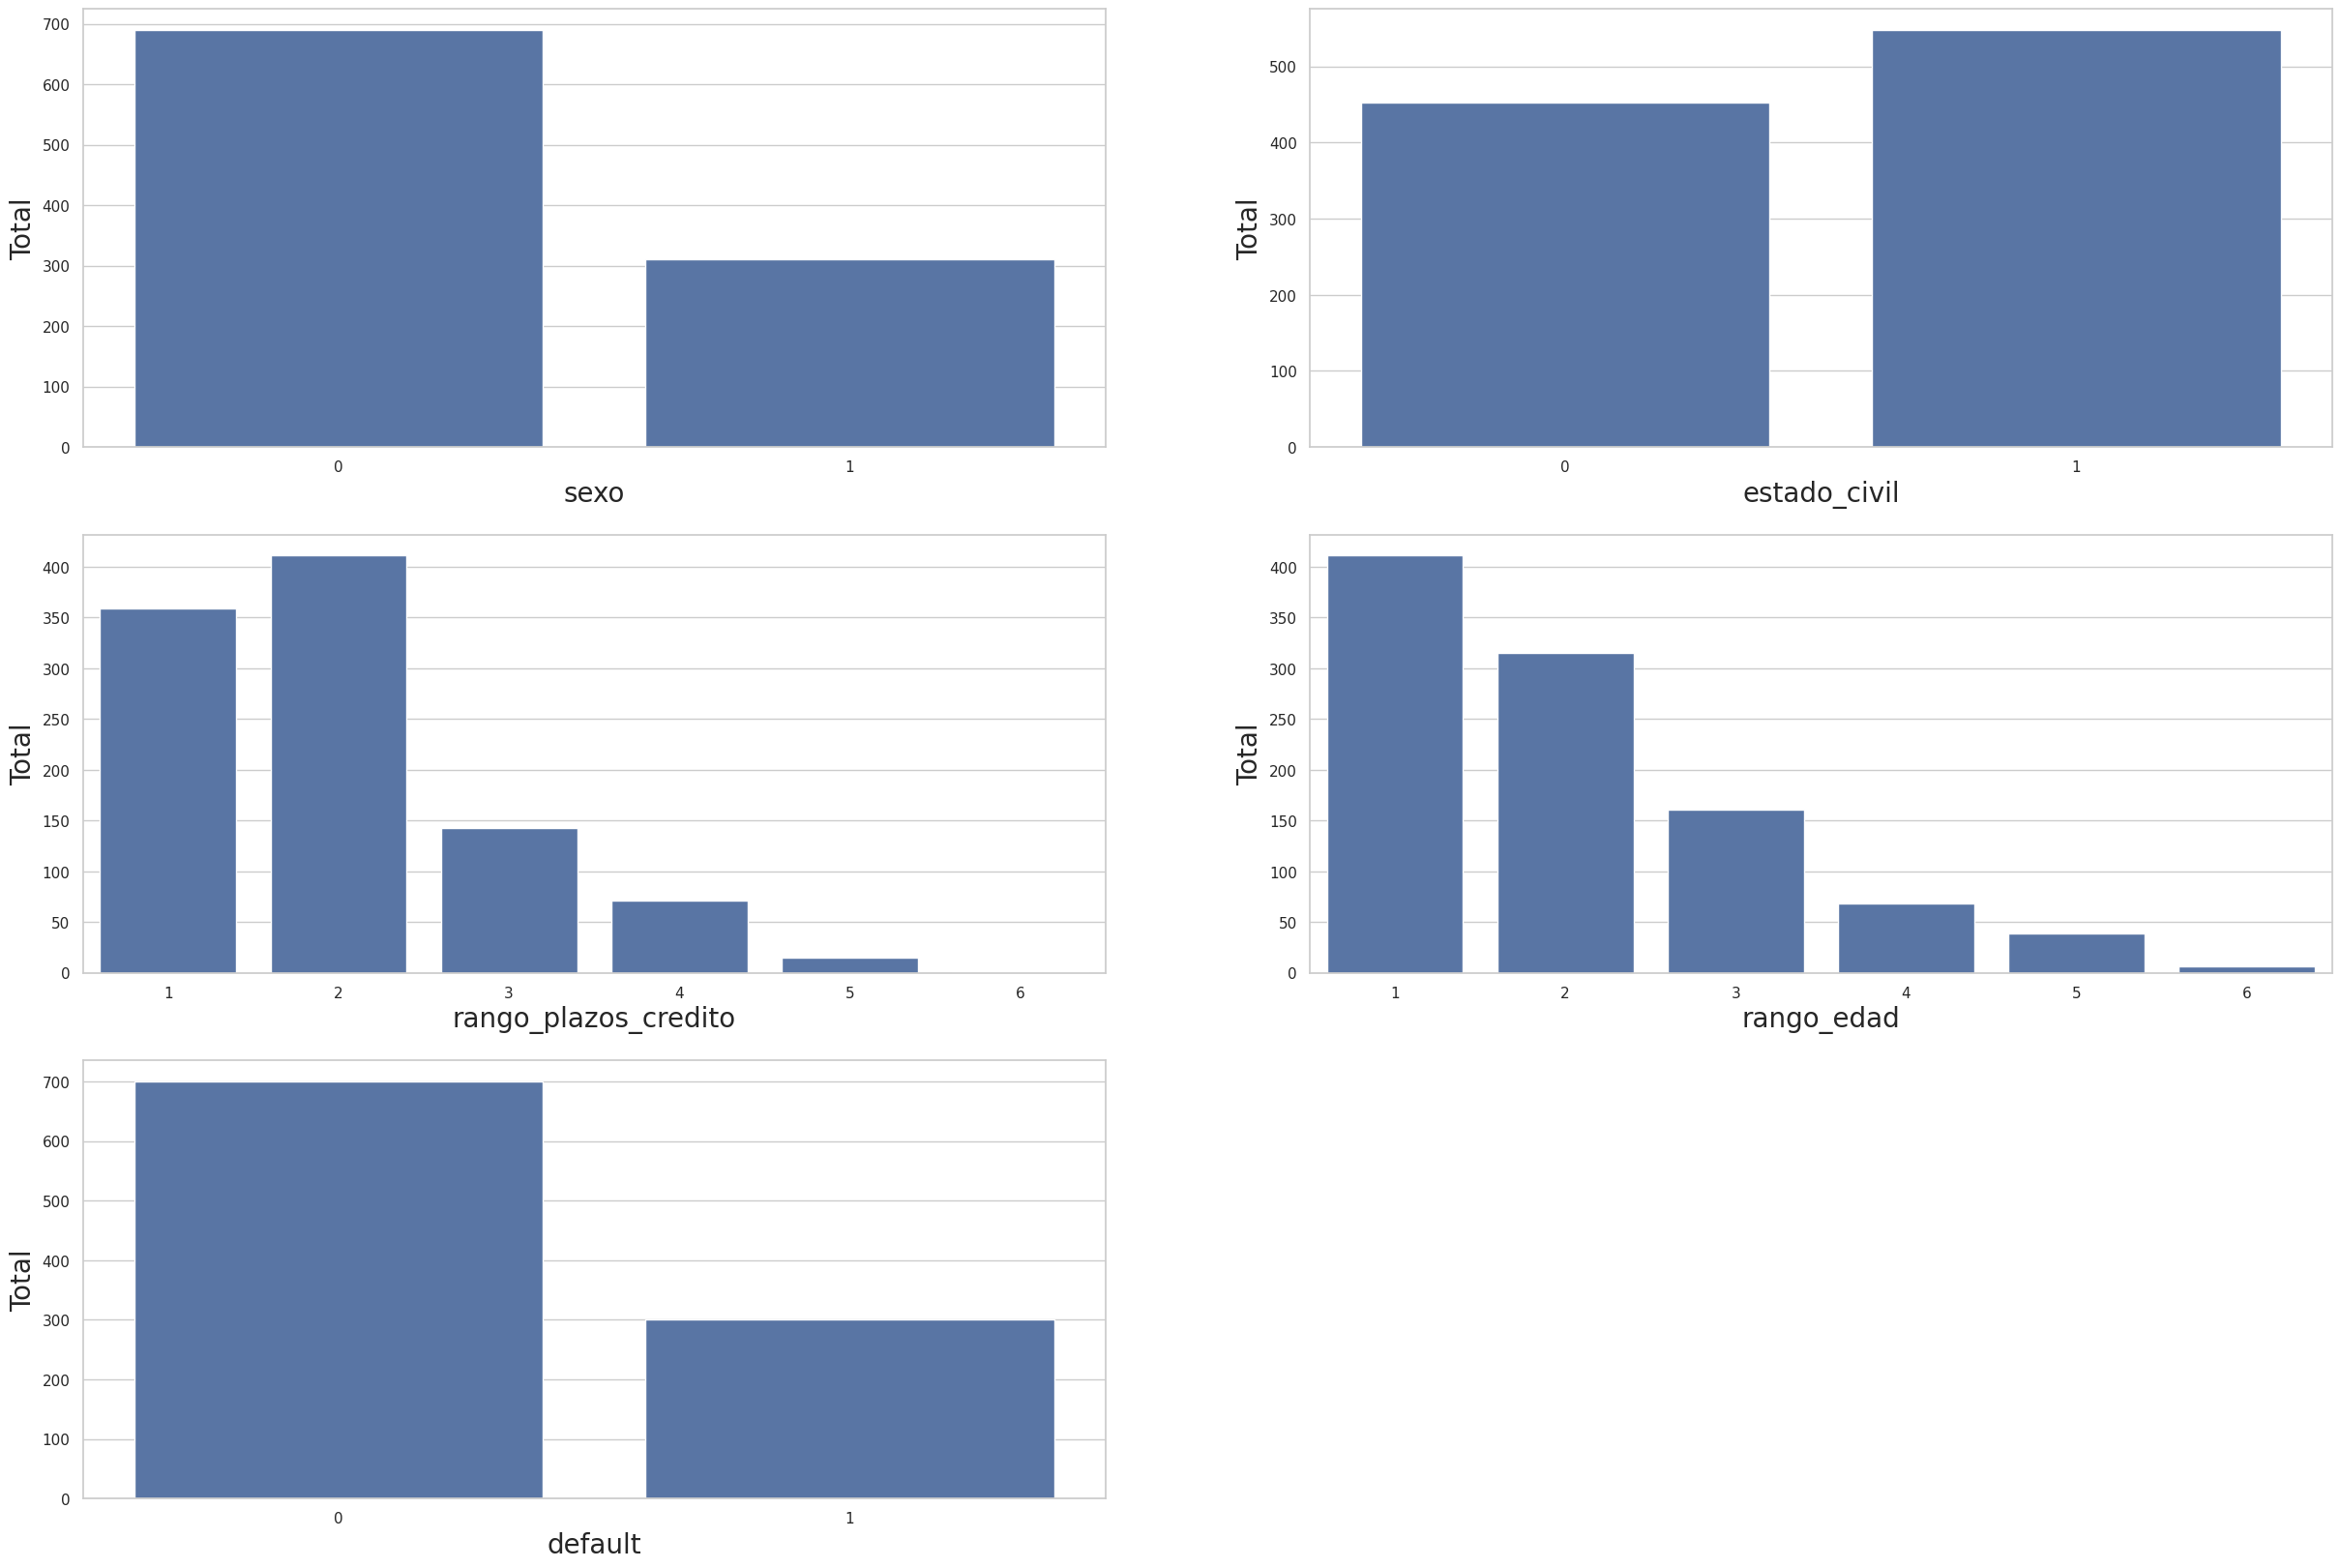

In [ ]:
analisis_exploratorio()

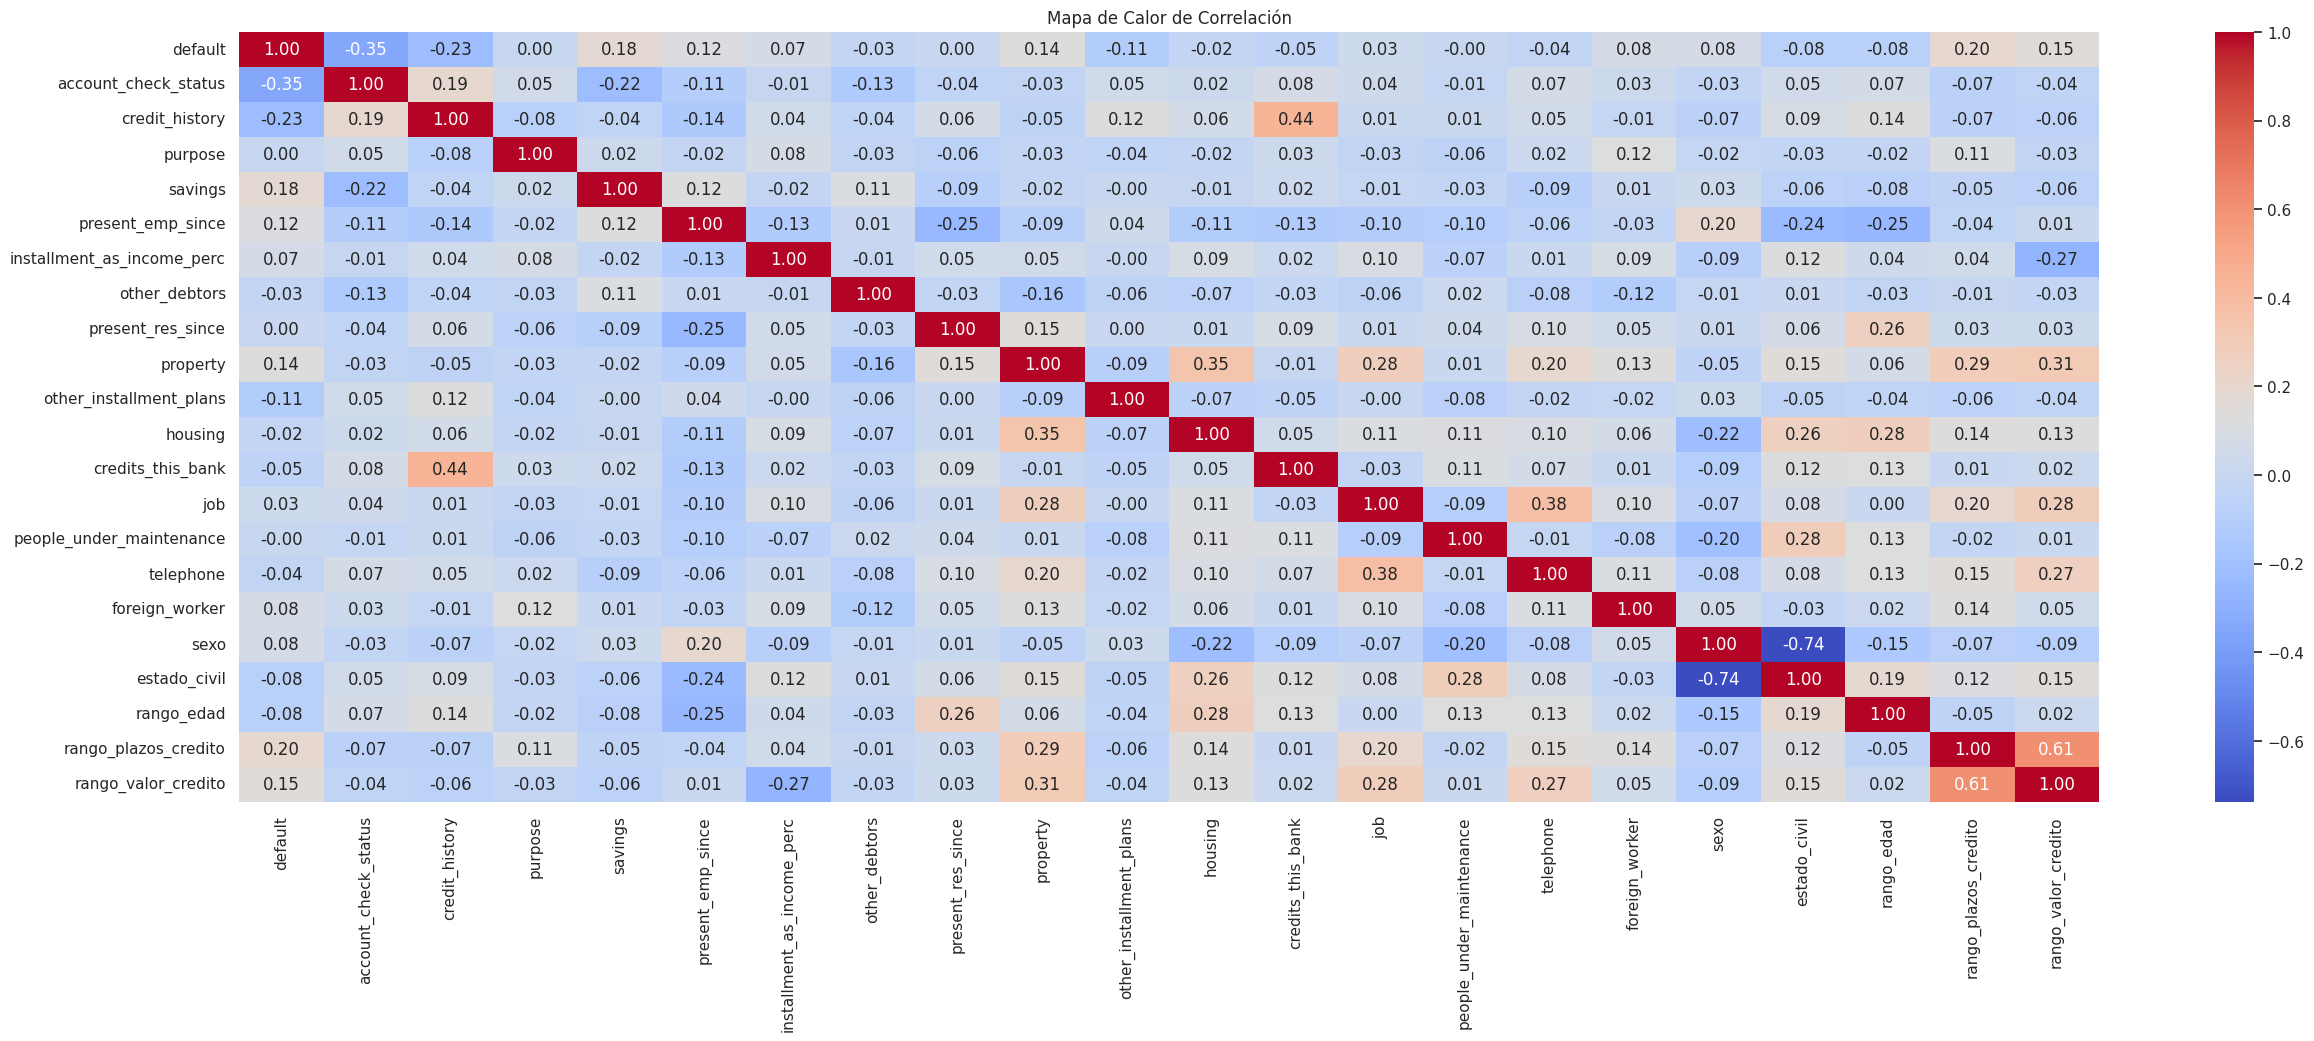

In [ ]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación')
plt.show()

 # 4. Construcción de Modelos

In [ ]:
# prompt: importar las siguientes bibliotecas: train_test_split, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [ ]:
# prompt: ejemplo de modelo machine learning de clasificacion

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# # 1. Preprocesar los datos
# # ... (your preprocessing code here)

# # 2. Dividir los datos en conjuntos de entrenamiento y prueba
# X = df_banco.drop('default', axis=1)
# y = df_banco['default']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # 3. Entrenar el modelo
# modelo = LogisticRegression()
# modelo.fit(X_train, y_train)

# # 4. Evaluar el modelo
# predicciones = modelo.predict(X_test)
# accuracy = accuracy_score(y_test, predicciones)
# print(f'Accuracy: {accuracy}')

# # 5. Mejorar el modelo (opcional)
# # ... (your model improvement code here)


In [ ]:
def crea_modelos():
  global df_banco, resultados
  y = df_banco['default']
  x = df_banco.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results

In [ ]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799934796783308


Árbol de Decisión
0.7066666666666667
0.4868421052631579
0.43023255813953487
0.45679012345679015
0.6239947837426646


Random Forest
0.8033333333333333
0.7872340425531915
0.43023255813953487
0.5563909774436091
0.7759454466420344


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




# 5. Evaluación y Selección del Modelo

In [ ]:
def visualiza_resultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

  # @title Texto de título predeterminado
  from IPython.display import HTML, display

  # Texto que quieres centrar
  texto = "¿Cuál de estos modelos seleccionarías y por qué?"

  # Crear una celda HTML con el texto centrado
  display(HTML(f"{texto}"))

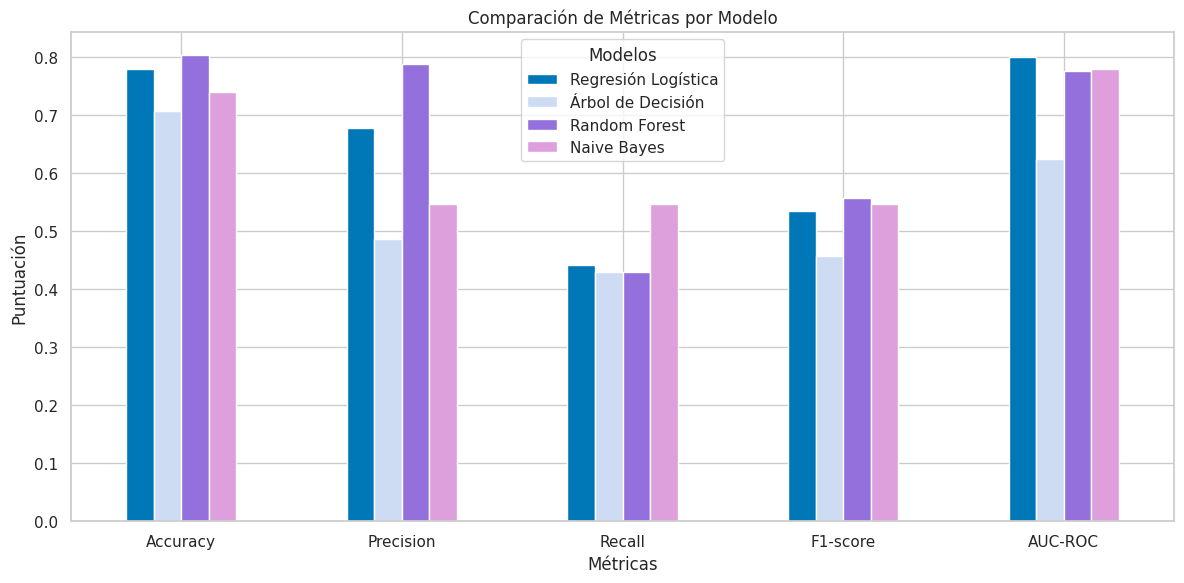

In [ ]:
visualiza_resultados()

# **¿Cuál de estos modelos seleccionarías y por qué?**

Con la información de la gráfica, el modelo que escogería el Random Forest ya que tiene más puntaje, y porque dicho modelo o técnica se puede usar para problemas relacionados con regresión y/o clasificación que, en este caso, sería clasificar a los clientes que sí pagaron el préstamo y los que no pagaron dicho préstamo.

# **Desafíos**

1. Evaluar la Matriz de Confusión

**- ¿Qué es una Matriz de Confusión?**

Es una tabla donde se muestra las relaciones de los valores de predicción con los valores real, es decir, si hay concordancia con ellos o no.

¿Cómo se lee una Matriz de Confusión?

La Matriz de Confusión cuenta con dos columnas (valores reales) y dos filas (valores predichos).

|          | Positivo           | Negativo           |
|    -     |            -       |      -             |
| Positivo | Verdadero Positivo | Falso Positivo     |
| Negativo | Falso Negativo     | Verdadero Negativo |


  - **Verdadero Positivo:** Indica que el valor predicho tiene relación con el valor real, por lo que el resultado es positivo perfecto.
  - **Verdadero Negativo:** Indica que el valor predicho tiene relación con el valor real, por lo que el resultado es negativo perfecto.
  - **Falso Positivo:** Indica que el valor predicho es incorrectamente positivo, es decir, el valor real es negativo, pero el valor predicho es positivo.
  - **Falso Negativo:** Indica que el valor predicho es incorrectamente negativo, es decir, el valor real es positivo, pero el valor predicho es negativo.

De manera resumida es el siguiente:

  - **Verdadero Positivo:** La predicción es positiva.
  - **Verdadero Negativo:** La predicción es negativa.
  - **Falso Positivo:** La predicción que fue positiva es falsa.
  - **Falso Negativo:** La predicción que fue negativa es falsa.

De esta forma podremos conocer la relación o concordancia de los datos que se están usando para entrenamiento y prueba y, de esta manera, podremos saber cuál es el modelo adecuado para usar.

**- ¿Qué tipos de errores puedes identificar a través de una Matriz de Confusión?**

Existen dos errores, error tipo I (1) y error tipo II (2).

  - **Error tipo 1:** Es cuando el resultado da como **Falso Positivo**. Por ejemplo: el cliente **no** pagó el préstamo, pero la prueba dice que realmente **sí** pagó dicho préstamo. En otras palabras, la prueba dice que sí pagó, pero la realidad es que no pagó.

  - **Error tipo 2:** Es cuando el resultado da como **Falso Negativo**. Por ejemplo: el cliente **sí** pagó el préstamo, pero la prueba dice que realmente **no** pagó dicho préstamo. En otras palabras, la prueba dice que no pagó, pero la realidad sí que no pagó.

**- ¿De qué manera, (según el problema de negocio que se está tratando), cuál métrica debes priorizar?**

Considero que Accuary sería el adecuado ya que, para este problema de negocio, se debe de conocer los clientes que no realizaron el pago del préstamo exactas para solucionarlo y que no haya fallos (o reducir la cantidad de fallos) con el machine learning.

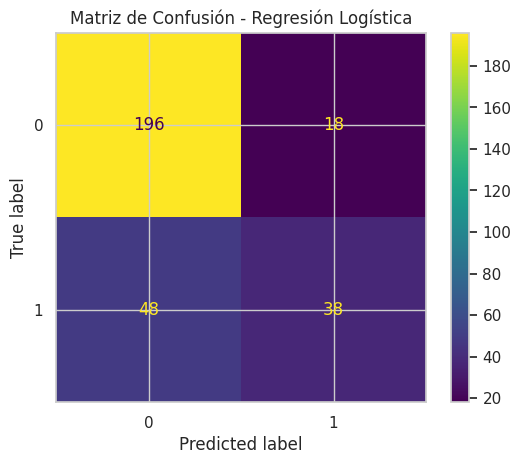

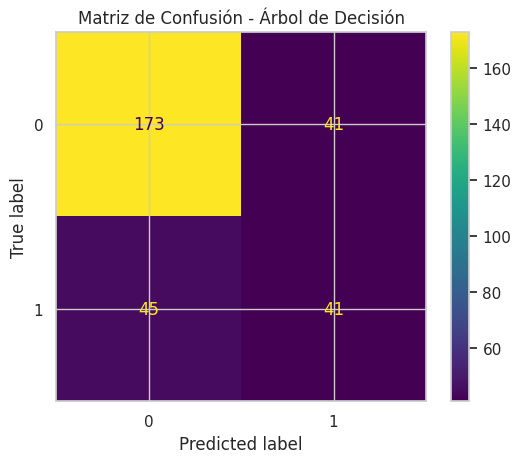

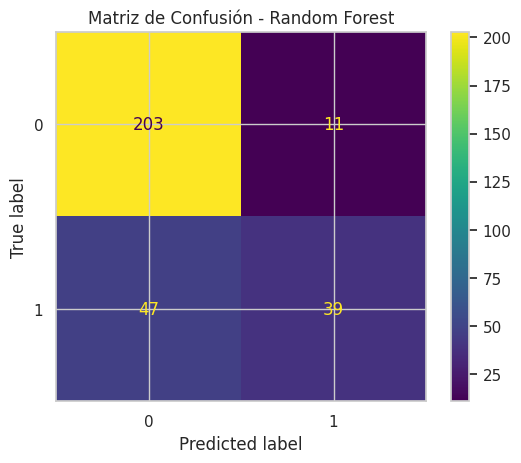

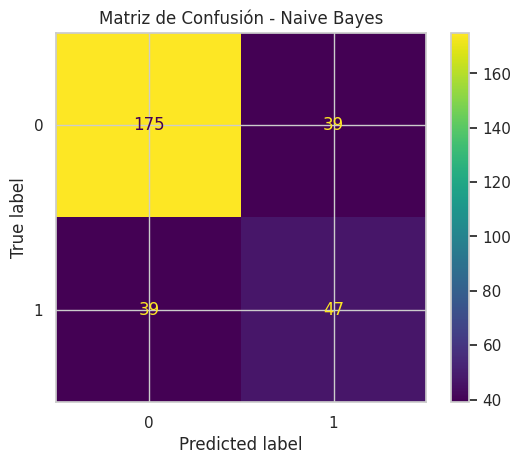

In [ ]:
# Se importa dos bibliotecas: confusion_matrix y ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Se declaran las variables para realizar el entrenamiento y pruebas
y1 = df_banco['default']
x1 = df_banco.drop(columns='default')
train_x, test_x, train_y, test_y = train_test_split(x1, y1, test_size=0.30, random_state = 77)

# Se declaran los modelos
models = {
    'Regresión Logística': LogisticRegression(),
    'Árbol de Decisión': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

results1 = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

# Se realizan las pruebas con los datos de entrenamiento con las de predicciones
for name, model in models.items():
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(test_x)
        roc_auc = roc_auc_score(test_y, proba[:, 1])
    else:
        roc_auc = None

    # Se guardan los resultados para mostrarlos
    results1['Model'].append(name)
    results1['Accuracy'].append(accuracy)
    results1['Precision'].append(precision)
    results1['Recall'].append(recall)
    results1['F1-score'].append(f1)
    results1['AUC-ROC'].append(roc_auc)

    # Se crea la matriz de confusión para ver la concordancia de los valores de las pruebas y predicciones
    matriz_confusion = confusion_matrix(test_y, predictions)
    mostrar_matriz_confusion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=model.classes_)
    mostrar_matriz_confusion.plot()
    plt.title(f'Matriz de Confusión - {name}')
    plt.show()

resultados1 = results1

2. Balancear la variable target

  Para realizar el balanceo con la variable target (default) se usó SMOTE para hacer un sboremuestreo ya que se necesita identificar a los clientes que no pagaron el préstamo. Si bien se pudo usar ```RandomOverSampler```, sin embargo, no habría sido correcto ya que algunos datos generados para el 1 (clientes que no pagaron) podían ser idénticos a los del 0 (clientes que sí pagaron), y podía ocasionar que se generaran falsos datos positivos, o datos que no sean correctos.

In [ ]:
from imblearn.over_sampling import SMOTE


x_smote = df_banco.drop('default', axis=1)
y_smote = df_banco['default']

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_smote, y_smote)

print("Distribución de clases original:", y_smote.value_counts())
print("Distribución de clases después del sobremuestreo:", y_resampled.value_counts())

Distribución de clases original: default
0    700
1    300
Name: count, dtype: int64
Distribución de clases después del sobremuestreo: default
0    700
1    700
Name: count, dtype: int64


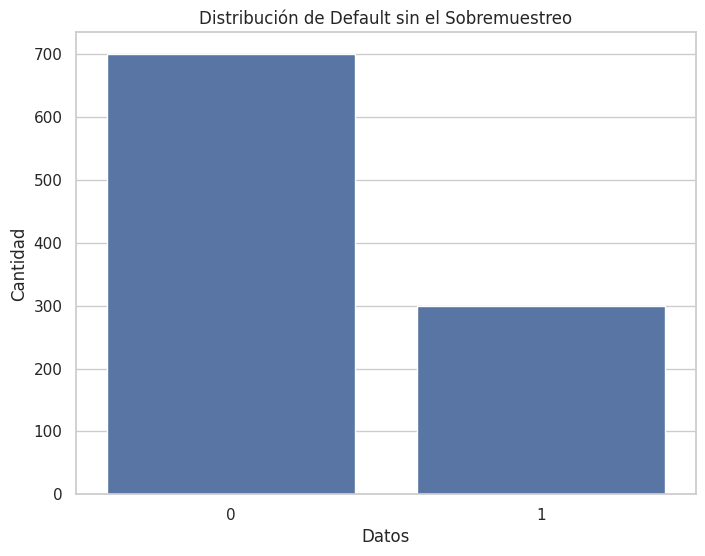

In [ ]:
# Crear un gráfico de barras sin el sobremuestreo hecho
plt.figure(figsize=(8, 6))
sns.countplot(x=y_smote)
plt.title('Distribución de Default sin el Sobremuestreo')
plt.xlabel('Datos')
plt.ylabel('Cantidad')
plt.show()

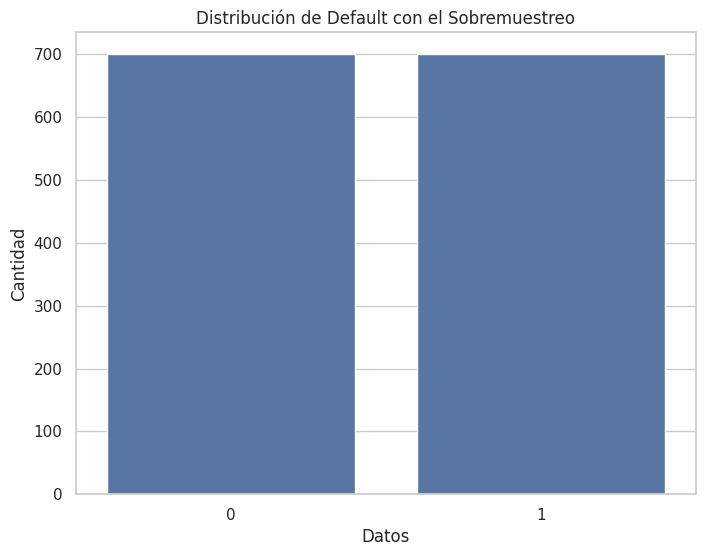

In [ ]:
# Crear un gráfico de barras con el sobremuestreo hecho
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Distribución de Default con el Sobremuestreo')
plt.xlabel('Datos')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
# Se crea la distribución de los modelos con el sobremuestreo de los datos default

# Crear nuevo DataFrame con los datos del sobremuestreo
df_banco_balanceado = pd.concat([pd.DataFrame(x_resampled), pd.DataFrame(y_resampled, columns=['default'])], axis=1)

df_banco1 = df_banco_balanceado
y2 = df_banco1['default']
x2 = df_banco1.drop(columns='default')
train_x, test_x, train_y, test_y = train_test_split(x2, y2, test_size=0.30, random_state = 77)

models = {
    'Regresión Logística': LogisticRegression(),
    'Árbol de Decisión': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

results2 = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

for name, model in models.items():
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(test_x)
        roc_auc = roc_auc_score(test_y, proba[:, 1])
    else:
        roc_auc = None

    results2['Model'].append(name)
    results2['Accuracy'].append(accuracy)
    results2['Precision'].append(precision)
    results2['Recall'].append(recall)
    results2['F1-score'].append(f1)
    results2['AUC-ROC'].append(roc_auc)

resultados2 = results2

In [ ]:
crea_modelos()
for i,model in enumerate(resultados2['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799934796783308


Árbol de Decisión
0.7066666666666667
0.4875
0.45348837209302323
0.46987951807228917
0.6309497935231472


Random Forest
0.7966666666666666
0.7358490566037735
0.45348837209302323
0.5611510791366905
0.769234948924147


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




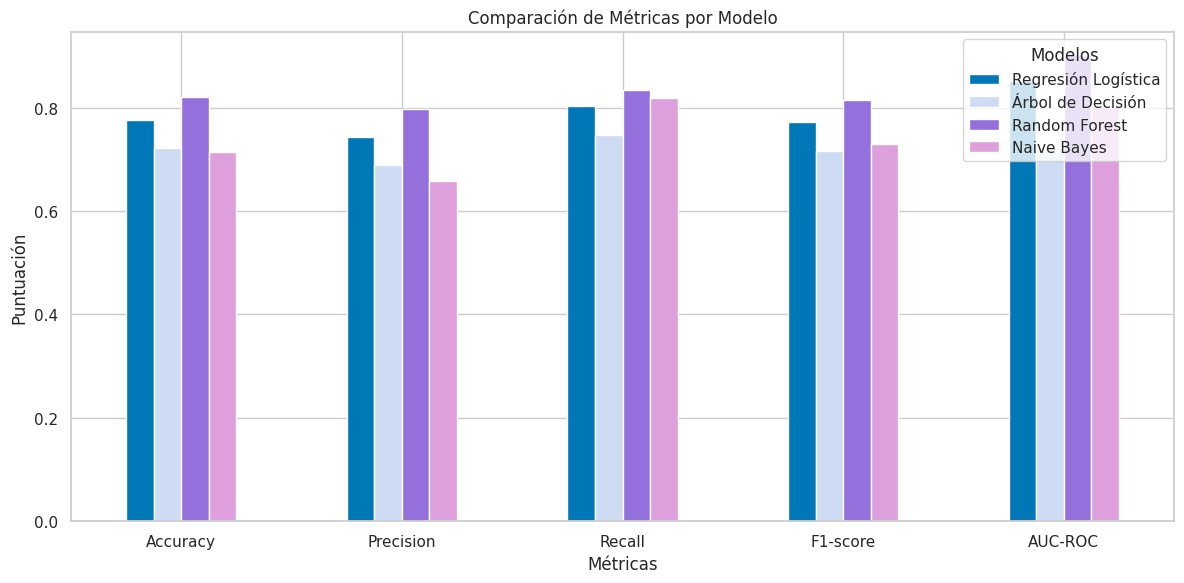

In [ ]:
# Visualizar los datos de los modelos con datos del sobremuestreo hecho

resultados_df = pd.DataFrame(resultados2)
resultados_df.set_index('Model', inplace=True)

# Transponer el DataFrame para facilitar la representación
resultados_df = resultados_df.T
colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

# Gráfico de barras agrupadas para cada métrica
resultados_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
plt.title('Comparación de Métricas por Modelo')
plt.xlabel('Métricas')
plt.ylabel('Puntuación')
plt.legend(title='Modelos')
plt.tight_layout()
plt.show()

Teniendo los datos de la variable "default" con el sobremuestreo, se visualiza que el modelo Random Forest es el que tiene más puntos en las cinco métricas, y la métrica que tiene mayor puntaje con Random Forest es AUC-ROC. Ésta métrica se podría también usar ya que, a lo que investigué, se puede usar para medir el acierto de las predicciones de eventos que sean binarios, es decir, eventos que sí ocurren o no ocurren.

Como lo es en este problema de negocio, donde diferenciamos a los clientes que sí realizaron el pago del préstamo como 0 y a los clientes que no realizaron el pago del préstamo como 1.

3. Seleccionar sólo algunas variables y reevaluar

Se seleccionaron las siguientes variables: ```rango_plazos_credito, rango_valor_credito, credit_history, creditr_this_bank, property, telephone, job, housing, estado_civil, rango_edad y people_under_maintenance```, ya que están dentro del rango del 0.80 y 0.30 del mapa de calor.

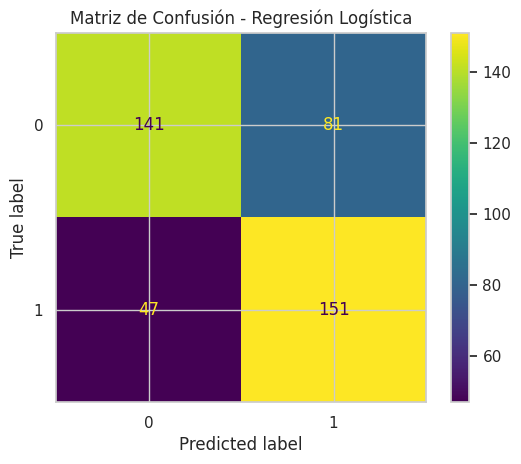

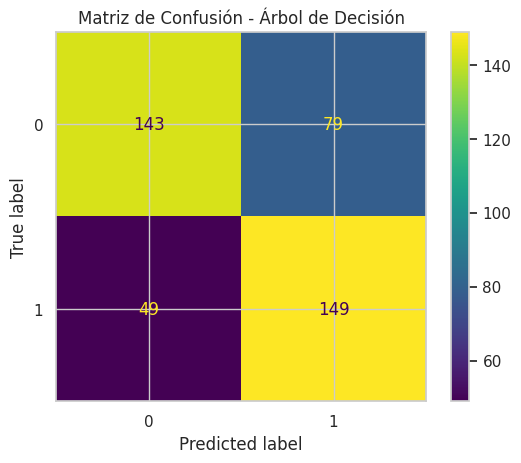

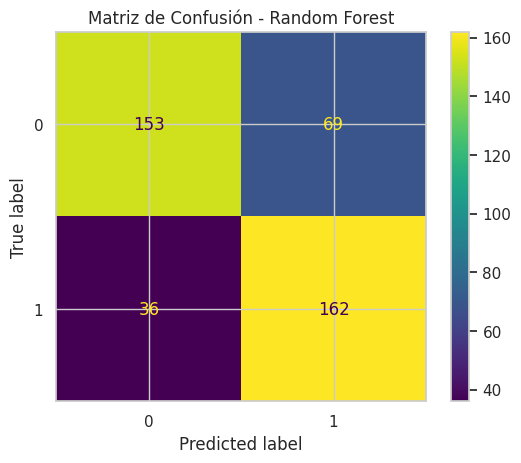

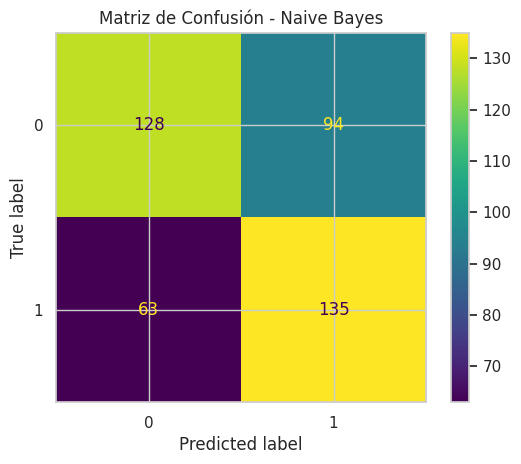



Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799934796783308


Árbol de Decisión
0.7066666666666667
0.4875
0.45348837209302323
0.46987951807228917
0.6309497935231472


Random Forest
0.7966666666666666
0.7358490566037735
0.45348837209302323
0.5611510791366905
0.769234948924147


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




In [ ]:
from imblearn.over_sampling import SMOTE

y = df_banco['default']
x = df_banco[["rango_plazos_credito", "rango_valor_credito", "credit_history", "credits_this_bank",
                   "property", "telephone", "job", "housing", "estado_civil", "rango_edad", "people_under_maintenance"]]

smote = SMOTE(random_state=42)
x_resampled1, y_resampled1 = smote.fit_resample(x, y)

train_x_3, test_x_3, train_y_3, test_y_3 = train_test_split(x_resampled1, y_resampled1, test_size=0.30, random_state = 77)

models3 = {
    'Regresión Logística': LogisticRegression(),
    'Árbol de Decisión': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

results3 = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

for name3, model3 in models3.items():
    model3.fit(train_x_3, train_y_3)
    predictions3 = model3.predict(test_x_3)
    accuracy3 = accuracy_score(test_y_3, predictions3)
    precision3 = precision_score(test_y_3, predictions3)
    recall3 = recall_score(test_y_3, predictions3)
    f1_3 = f1_score(test_y_3, predictions3)
    if hasattr(model3, "predict_proba"):
        proba = model3.predict_proba(test_x_3)
        roc_auc_3 = roc_auc_score(test_y_3, proba[:, 1])
    else:
        roc_auc_3 = None

    results3['Model'].append(name3)
    results3['Accuracy'].append(accuracy3)
    results3['Precision'].append(precision3)
    results3['Recall'].append(recall3)
    results3['F1-score'].append(f1_3)
    results3['AUC-ROC'].append(roc_auc_3)

    # Crear la matriz de confusión

    matriz_confusion_1 = confusion_matrix(test_y_3, predictions3)
    mostrar_matriz_confusion_3 = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_1, display_labels=model3.classes_)
    mostrar_matriz_confusion_3.plot()
    plt.title(f'Matriz de Confusión - {name3}')
    plt.show()

resultados3 = results3

print('\n')

# Mostrar los modelos de las variables elegidas con el sobremuestro hecho

for i,model in enumerate(resultados3['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

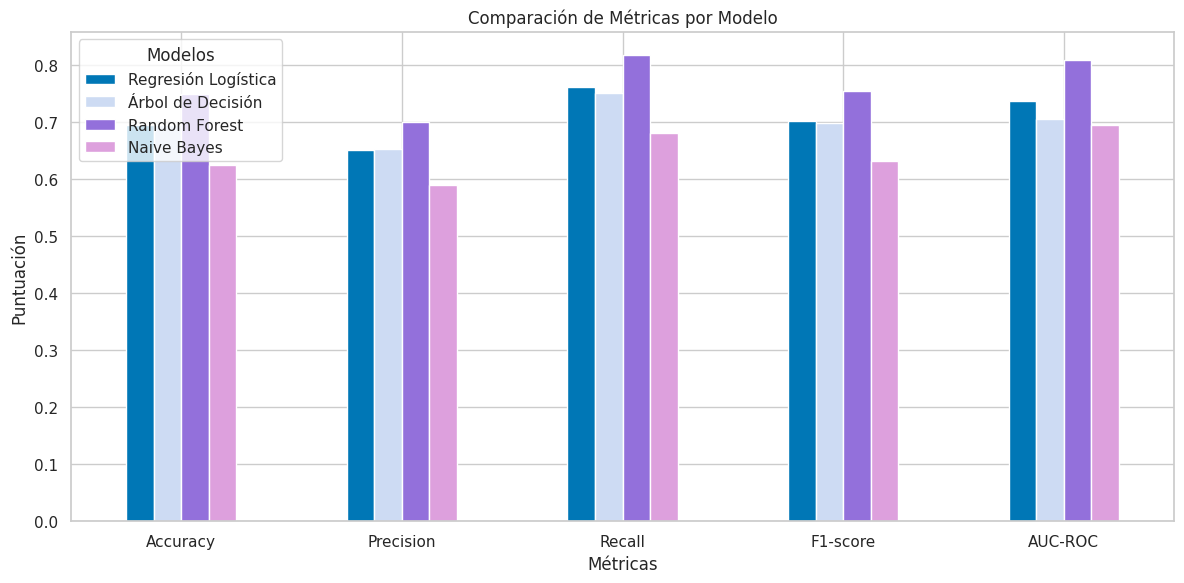

In [ ]:
# Visualizar los datos de los modelos de las variables elegidas con el sobremuestro hecho

resultados_df1 = pd.DataFrame(resultados3)
resultados_df1.set_index('Model', inplace=True)

# Transponer el DataFrame para facilitar la representación
resultados_df1 = resultados_df1.T
colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

# Gráfico de barras agrupadas para cada métrica
resultados_df1.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
plt.title('Comparación de Métricas por Modelo')
plt.xlabel('Métricas')
plt.ylabel('Puntuación')
plt.legend(title='Modelos')
plt.tight_layout()
plt.show()

Ahora con las variables con mayor cantidad de mapa de calor y con el sobremuestreo hecho, se visualiza que el modelo que tiene más puntos es el mismo Random Forest, pero ahora la métrica otra vez cambió, la métrica que tiene más puntos con Random Forest es Recall. Pienso que Recall no sea la métrica para usar ya que es para saber cuántos valores o casos positivos salieron correctamente clasificados o identificados, y en este caso de problema de negocio, no solo necesitamos los datos positivos, también necesitamos los datos negativos para saber los clientes que no realizaron el pago de préstamos.

Por lo que, elegiría entre la métrica Accuary o AUC-ROC, ya que el Accuary es para tener los datos exactos de los clientes que sí pagaron el préstamo y los que no pagaron dicho préstamo; y AUC-ROC es para medir el acierto de las predicciones de eventos binarios, es decir, si sí pasó o no pasó, usando 0 y 1.